In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular workspace, you'll practice creating single-variable plots for categorical data.

#Bar Chart Exercise Practical 4
21 AI


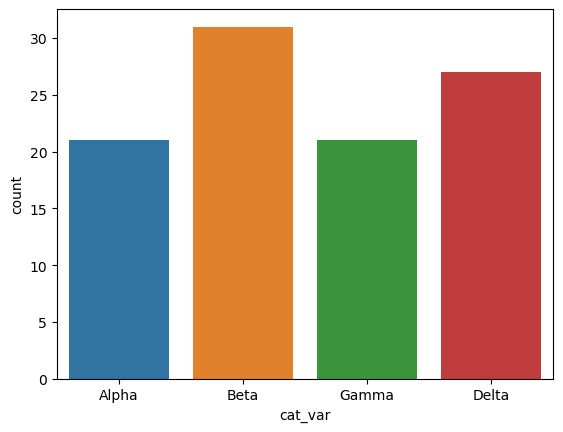

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import random
import numpy as np

# Sample data with varied frequencies
categories = ['Alpha', 'Beta', 'Gamma', 'Delta']
data = {'cat_var': random.choices(categories, k=100)}  # Vary the number 100 to change the total count

df = pd.DataFrame(data)

# Define the order of categories
level_order = ['Alpha', 'Beta', 'Gamma', 'Delta']
ordered_cat = pd.CategoricalDtype(ordered=True, categories=level_order)
df['cat_var'] = df['cat_var'].astype(ordered_cat)

# Create the bar chart
#base_color = sb.color_palette()[0]
sb.countplot(data=df, x='cat_var')

# Show the plot
plt.show();


Text(0, 0.5, 'proportion')

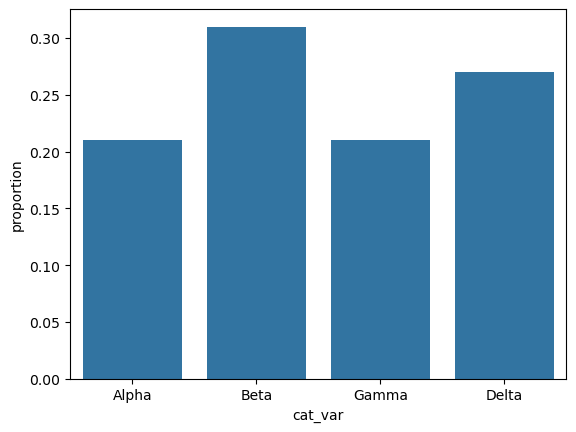

In [2]:
# get proportion taken by most common group for derivation
# of tick marks
n_points = df.shape[0]
max_count = df['cat_var'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cat_var', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')


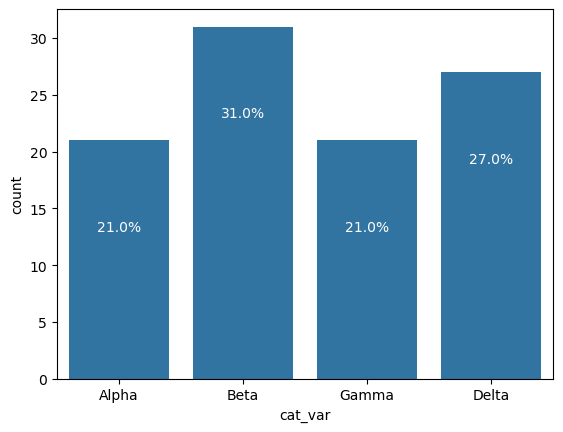

In [3]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cat_var', color = base_color)

# add annotations
n_points = df.shape[0]
cat_counts = df['cat_var'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')

In [4]:
#Counting Missing Data
#One interesting way we can apply bar charts is through the visualization of missing data. 
#We can use pandas functions to create a table with the number of missing values in each column.m
df.isna().sum()

cat_var    0
dtype: int64

In [6]:
na_counts = df.isna().sum()
base_color = sb.color_palette()[0]
#sb.barplot(na_counts.index.values, na_counts, color = base_color)

Missing Values Count:
A    1
B    2
C    0
dtype: int64


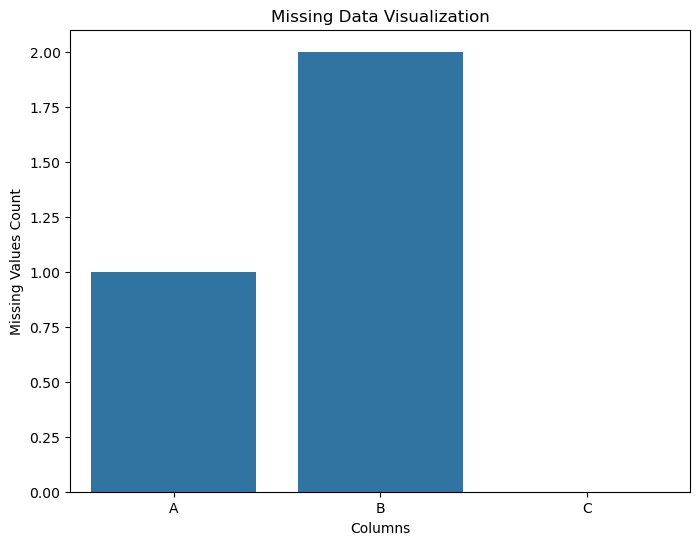

In [7]:
# one more precise example
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with missing values
data = {
    'A': [1, 2, None, 4, 5],
    'B': [None, 2, 3, None, 5],
    'C': [1, 2, 3, 4, 5]
}

df = pd.DataFrame(data)

# Print the count of missing values
missing_values = df.isna().sum()
print("Missing Values Count:")
print(missing_values)

# Create a bar chart to visualize missing values
plt.figure(figsize=(8, 6))
base_color = sns.color_palette()[0]
sns.barplot(x=missing_values.index, y=missing_values, color=base_color)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Data Visualization')
plt.xticks(rotation=0)
plt.show()


In [9]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In this workspace, you'll be working with this dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in [this GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [10]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: There have been quite a few Pokémon introduced over the series' history. How many were introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

<Axes: xlabel='generation_id', ylabel='count'>

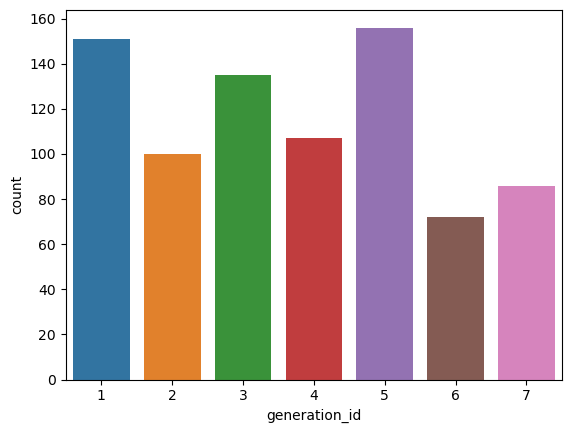

In [11]:
# YOUR CODE HERE
sb.countplot(data=pokemon, x='generation_id')

Once you've created your chart, run the cell below to check the output from our solution. Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.

**Task 2**: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of the type counts in a single column.

In [13]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

Text(0.5, 0, 'proportion')

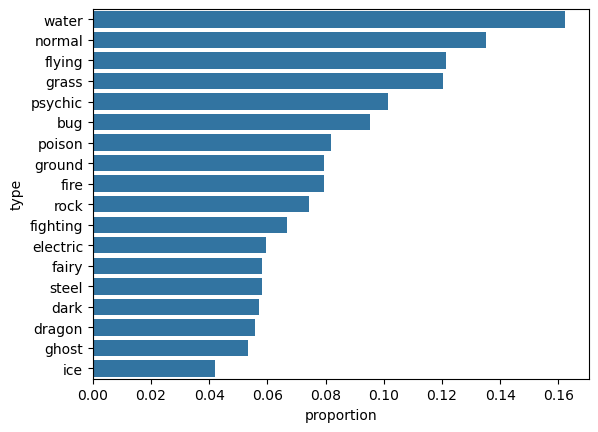

In [14]:
# YOUR CODE HERE
# get order of bars by frequency
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

 # compute largest proportion
n_pokemon = pkmn_types['species'].unique().shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon

 # establish tick locations and create plot
base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')

If you're interested in seeing the code used to generate the solution plots, you can find it in the `solutions_univ.py` script in the workspace folder. You can navigate there by clicking on the Jupyter icon in the upper left corner of the workspace. Spoiler warning: the script contains solutions for all of the workspace exercises in this lesson, so take care not to spoil your practice!